#### Import necessary libraries

In [1]:
import pandas as pd

#### Read in and explore the data

In [2]:
df = pd.read_csv('cleaned_automobile.csv')
print(df.shape)
print(df.dtypes)
df.head()

(225, 32)
Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
Car Size             float64
dtype: object


,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,Car Size
0,0,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,...,5000.0,21.0,27.0,13495.0,11.190476,9.370370,low,0,1,0.589311
1,1,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,...,5000.0,21.0,27.0,16500.0,11.190476,9.370370,low,0,1,0.589311
2,2,1,121,alfa-romero,std,two,hatchback,rwd,front,94.5,...,5000.0,19.0,26.0,16500.0,12.368421,9.730769,medium,0,1,0.655799
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,5500.0,24.0,30.0,13950.0,9.791667,8.433333,low,0,1,0.708505
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,5500.0,18.0,22.0,17450.0,13.055556,11.500000,low,0,1,0.710645


#### Convert Categorical Data to Numerical Form

In [6]:
# One-hot encoding for categorical columns
categorical_columns = ['make', 'engine-location', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-type', 
                       'num-of-cylinders', 'fuel-system', 'horsepower-binned']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_low,horsepower-binned_medium
0,0,3,121,88.6,0.811148,0.890278,0.816054,2548.0,130.0,3.47,...,0,0,0,0,0,1,0,0,1,0
1,1,3,121,88.6,0.811148,0.890278,0.816054,2548.0,130.0,3.47,...,0,0,0,0,0,1,0,0,1,0
2,2,1,121,94.5,0.822681,0.909722,0.876254,2823.0,152.0,2.68,...,0,0,0,0,0,1,0,0,0,1
3,3,2,164,99.8,0.848630,0.919444,0.908027,2337.0,109.0,3.19,...,0,0,0,0,0,1,0,0,1,0
4,4,2,164,99.4,0.848630,0.922222,0.908027,2824.0,136.0,3.19,...,0,0,0,0,0,1,0,0,1,0


#### Standardize Features

In [7]:
from sklearn.preprocessing import StandardScaler


In [8]:
# Exclude non-feature columns for scaling - our target feature
columns_to_scale = df_encoded.columns.difference(['city-mpg'])

In [9]:
scaler = StandardScaler()

In [10]:
# Fit on the data and then transform it
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

#### Data Splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Define the features and the target variable
X = df_encoded.drop('city-mpg', axis=1)
y = df_encoded['city-mpg']

In [14]:
# Splitting the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Modelling

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
# Initialize KNN regressor with k=5 (as a starting point)
knn = KNeighborsRegressor(n_neighbors=5)

In [22]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

#### Model Evaluation

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
# Predictions
y_pred = knn.predict(X_test)
y_pred

array([22. , 24.4, 28. , 23.4, 30.4, 23.8, 26.4, 31. , 37.4, 20.2, 16.2,
       19.4, 22.4, 29.4, 30.4, 18. , 35.6, 18.8, 18.2, 26.6, 21.6, 31.8,
       26.6, 31. , 31. , 26.4, 22.4, 29.8, 25.8, 22.6, 31.8, 28.6, 19.4,
       20.4, 23.6, 28.8, 22.4, 19. , 25.6, 26.6, 26.6, 23.6, 26.6, 25. ,
       27.2, 26. , 26.2, 18.2, 20.2, 25.2, 24.6, 21.6, 31. , 31. , 30.4,
       26.6, 29.4, 31.8, 34.4, 22.4, 20.8, 16.6, 30.4, 31.8, 22.6, 23. ,
       29.4, 19.4])

In [28]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Score: {r2:.2f}")

Mean Absolute Error: 2.60
Mean Squared Error: 13.96
R^2 Score: 0.70



#### MAE

MAE of 2.60 means that on average, the model's predictions are about 2.60 mpg off from the actual values. The practical implications of this error will depend on specific application. For instance, if providing fuel efficiency estimates to customers for purchasing decisions, then even a small discrepancy might be significant. Conversely, if the goal is to see general patterns or relationships, this might be acceptable.

#### MSE

MSE of 13.96 implies that there might be a few predictions that are notably off from the actual values, as squared differences penalize outliers more than MAE.



#### R-Squared

The R-squared of 0.70 suggests that the model captures a good portion of the variance in the data. It's generally considered a decent score for many real-world datasets, especially in initial exploratory phases.

#### Optimizing 'K'

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [31]:
# Define a range of 'K' values to test
k_values = range(1, 31)
cross_val_scores = []

In [32]:
# Iterate through all K values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cross_val_scores.append(scores.mean())

In [33]:
# Convert negative MSE to positive and then to RMSE
rmse_values = [abs(value)**0.5 for value in cross_val_scores]

In [34]:
# Determine the best 'K' value
optimal_k = k_values[rmse_values.index(min(rmse_values)) + 1]

In [35]:
print(f"The optimal number of neighbors (K) is: {optimal_k}")

The optimal number of neighbors (K) is: 3


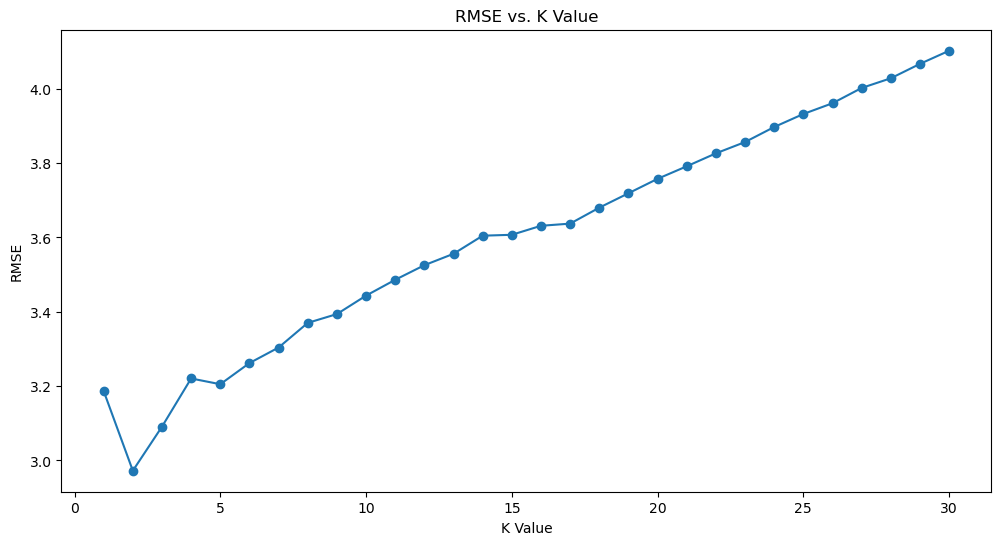

In [36]:
# Plot the RMSE values against K values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.title('RMSE vs. K Value')
plt.show()

#### Weighted KNN

In [37]:
# Using the optimal K value from above for weighted KNN
knn_weighted = KNeighborsRegressor(n_neighbors=optimal_k, weights='distance')
knn_weighted.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [38]:
# Making predictions on the test set
y_pred_weighted = knn_weighted.predict(X_test)
y_pred_weighted

array([22.59118435, 26.53076898, 28.35429465, 24.8633123 , 29.62084983,
       23.        , 26.90009897, 31.        , 37.44565649, 19.91941113,
       14.56646057, 18.1975874 , 23.32186685, 32.81127238, 32.2756501 ,
       15.33208107, 33.70044421, 19.28688409, 18.38193295, 26.04044185,
       19.12698097, 32.33881471, 25.95694549, 30.63086152, 31.        ,
       25.19853315, 23.09516732, 28.44648765, 23.11309691, 19.        ,
       29.99514948, 30.60840844, 18.09854959, 18.34608026, 22.64336315,
       27.29140212, 21.32823357, 19.        , 25.4786921 , 24.92494542,
       24.36736389, 22.64711536, 26.67164658, 24.91043646, 28.23745124,
       24.        , 22.42747009, 17.        , 17.02874338, 23.90367859,
       23.07276589, 23.29693612, 31.        , 31.        , 29.95630575,
       27.10505583, 32.81181795, 32.29513168, 33.98767336, 20.90664508,
       20.68839868, 15.46732948, 33.319033  , 32.36634832, 19.        ,
       22.84252164, 29.45978059, 18.58861484])

In [39]:
# Evaluate the performance of the weighted KNN model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
mae_weighted = mean_absolute_error(y_test, y_pred_weighted)
mse_weighted = mean_squared_error(y_test, y_pred_weighted)
r_squared_weighted = r2_score(y_test, y_pred_weighted)

In [42]:
print(f"Weighted KNN - Mean Absolute Error: {mae_weighted:.2f}")
print(f"Weighted KNN - Mean Squared Error: {mse_weighted:.2f}")
print(f"Weighted KNN - R-squared Score: {r_squared_weighted:.2f}")

Weighted KNN - Mean Absolute Error: 1.92
Weighted KNN - Mean Squared Error: 10.53
Weighted KNN - R-squared Score: 0.78


#### Optimal Number of Neighbors (k): 
The model achieved its best performance with k=3. This indicates that considering the closest 3 data points to a given test instance proved to be the most effective for this dataset and the target feature.